<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset with brain atlas B for continous prediction tasks: For the second set of 5 small programming tasks use the Oasis dataset provided by the nilearn package, which can be downloaded using the code below. This is a dataset of structural brain scans (aka voxel- based morphometry) for male and female individuals.

Analogous to task 1, but predicting continuous subject age with sklearn.neighbors.KNeighborsRegressor(n_neighbors=5) and using 43 different versions of Craddock region atlas resolutions (.scorr_mean) instead of the 10 region numbers from Dataset A. Use R2 coefficient of determination instead of classification accuracy, which can be found at sklearn.metrics.r2_score.

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# We prepare the models with the required parameters
ridge = Ridge(max_iter=1e4)
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# We define the iterating variable
versions = list(range(1,43))

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
ridge_tr_acc = []
knn_tr_acc = []

ridge_test_acc = []
knn_test_acc = []

In [ ]:
for x in versions:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
    crad = datasets.fetch_atlas_craddock_2012()
    atlas_nii = index_img(crad['scorr_mean'], (x))
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    RidgeReg = ridge.fit(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    ridge_tr_acc.append(score_R) # We store the scores
    print('Ridge training accuracy (coefficient of determination): %.2f' % ((score_R))) # We print the scores

    kNN = knn.fit(X_train,y_train) # We fit the kNN training model
    score_k = kNN.score(X_train, y_train)
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy (coefficient of determination): %.2f' % ((score_k))) # We print the scores

    yhat_R = ridge.predict(X_test) # We use the ridge model to predict and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) 
    ridge_test_acc.append(score_Rt) # We store the scores
    print('Ridge test accuracy (coefficient of determination): %.2f' % ((score_Rt))) # We print the scores

    yhat_k = knn.predict(X_test) # We use the kNN model to predict and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy (coefficient of determination): %.2f' % ((score_k))) # We print the scores

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.69
kNN training accuracy (coefficient of determination): 0.60
Ridge test accuracy (coefficient of determination): -3.11
kNN test accuracy (coefficient of determination): 0.09


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.80
kNN training accuracy (coefficient of determination): 0.65
Ridge test accuracy (coefficient of determination): -1.01
kNN test accuracy (coefficient of determination): 0.06


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.81
kNN training accuracy (coefficient of determination): 0.57
Ridge test accuracy (coefficient of determination): -1.64
kNN test accuracy (coefficient of determination): 0.14


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.88
kNN training accuracy (coefficient of determination): 0.58
Ridge test accuracy (coefficient of determination): -1.69
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.92
kNN training accuracy (coefficient of determination): 0.59
Ridge test accuracy (coefficient of determination): 0.04
kNN test accuracy (coefficient of determination): 0.20


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.95
kNN training accuracy (coefficient of determination): 0.64
Ridge test accuracy (coefficient of determination): -0.65
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.95
kNN training accuracy (coefficient of determination): 0.62
Ridge test accuracy (coefficient of determination): -0.42
kNN test accuracy (coefficient of determination): 0.23


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.98
kNN training accuracy (coefficient of determination): 0.62
Ridge test accuracy (coefficient of determination): -0.11
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.99
kNN training accuracy (coefficient of determination): 0.63
Ridge test accuracy (coefficient of determination): -0.70
kNN test accuracy (coefficient of determination): 0.25


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.98
kNN training accuracy (coefficient of determination): 0.61
Ridge test accuracy (coefficient of determination): -1.06
kNN test accuracy (coefficient of determination): 0.23


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.99
kNN training accuracy (coefficient of determination): 0.65
Ridge test accuracy (coefficient of determination): -0.39
kNN test accuracy (coefficient of determination): 0.28


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.99
kNN training accuracy (coefficient of determination): 0.60
Ridge test accuracy (coefficient of determination): -2.43
kNN test accuracy (coefficient of determination): 0.29


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 0.99
kNN training accuracy (coefficient of determination): 0.64
Ridge test accuracy (coefficient of determination): -2.30
kNN test accuracy (coefficient of determination): 0.28


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.63
Ridge test accuracy (coefficient of determination): -1.88
kNN test accuracy (coefficient of determination): 0.26


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.94
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -1.10
kNN test accuracy (coefficient of determination): 0.18


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.63
Ridge test accuracy (coefficient of determination): -0.90
kNN test accuracy (coefficient of determination): 0.30


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.33
kNN test accuracy (coefficient of determination): 0.23


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.61
Ridge test accuracy (coefficient of determination): -0.74
kNN test accuracy (coefficient of determination): 0.30


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.68
Ridge test accuracy (coefficient of determination): -0.49
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.62
Ridge test accuracy (coefficient of determination): -1.73
kNN test accuracy (coefficient of determination): 0.30


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.69
Ridge test accuracy (coefficient of determination): -0.66
kNN test accuracy (coefficient of determination): 0.25


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.63
Ridge test accuracy (coefficient of determination): -0.43
kNN test accuracy (coefficient of determination): 0.22


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.57
kNN test accuracy (coefficient of determination): 0.30


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.65
Ridge test accuracy (coefficient of determination): -0.32
kNN test accuracy (coefficient of determination): 0.31


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.37
kNN test accuracy (coefficient of determination): 0.31


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.45
kNN test accuracy (coefficient of determination): 0.24


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.69
Ridge test accuracy (coefficient of determination): -0.23
kNN test accuracy (coefficient of determination): 0.33


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.22
kNN test accuracy (coefficient of determination): 0.33


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.69
Ridge test accuracy (coefficient of determination): -0.34
kNN test accuracy (coefficient of determination): 0.32


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.69
Ridge test accuracy (coefficient of determination): -0.26
kNN test accuracy (coefficient of determination): 0.33


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.72
Ridge test accuracy (coefficient of determination): -0.18
kNN test accuracy (coefficient of determination): 0.35


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.69
Ridge test accuracy (coefficient of determination): -0.07
kNN test accuracy (coefficient of determination): 0.31


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.70
Ridge test accuracy (coefficient of determination): -0.05
kNN test accuracy (coefficient of determination): 0.31


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.73
Ridge test accuracy (coefficient of determination): -0.03
kNN test accuracy (coefficient of determination): 0.35


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.72
Ridge test accuracy (coefficient of determination): -0.05
kNN test accuracy (coefficient of determination): 0.34


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.72
Ridge test accuracy (coefficient of determination): 0.00
kNN test accuracy (coefficient of determination): 0.33


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.73
Ridge test accuracy (coefficient of determination): -0.10
kNN test accuracy (coefficient of determination): 0.30


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.74
Ridge test accuracy (coefficient of determination): -0.12
kNN test accuracy (coefficient of determination): 0.32


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.71
Ridge test accuracy (coefficient of determination): 0.04
kNN test accuracy (coefficient of determination): 0.34


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.71
Ridge test accuracy (coefficient of determination): -0.04
kNN test accuracy (coefficient of determination): 0.23


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Ridge training accuracy (coefficient of determination): 1.00
kNN training accuracy (coefficient of determination): 0.74
Ridge test accuracy (coefficient of determination): 0.12
kNN test accuracy (coefficient of determination): 0.34


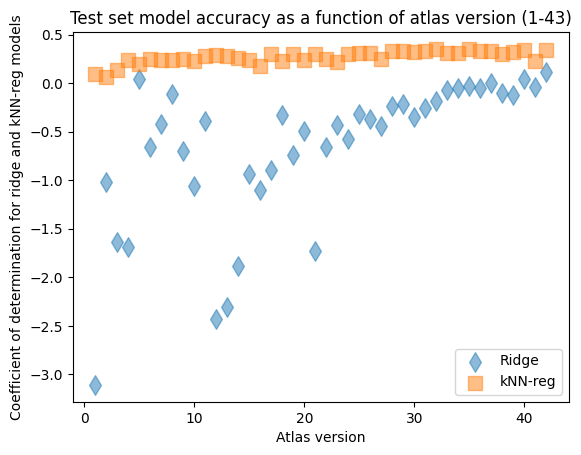

In [ ]:
# We're ready to plot
lab = ['Ridge', 'kNN-reg']
plt.style.use("default")
plt.scatter(versions,ridge_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(versions,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.legend(labels=(lab))
plt.gca().set(
    title="Test set model accuracy as a function of atlas version (1-43)",
    xlabel="Atlas version",
    ylabel="Coefficient of determination for ridge and kNN-reg models",
)
plt.show()

kNN with 5 neighbours systematically outperform ridge regression, regardless of the number of ROIs, which increase with each atlas number. 